In [24]:
import os
import pandas as pd
import sklearn
import csv
import datetime
import numpy as np
# 可視化用
import japanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## データの読み込み


入力データ

http://mlr.cs.umass.edu/ml/datasets/Adult


In [25]:
ls ../data/adult/

adult.data   adult.names  adult.test


In [26]:
# 学習用データ
!head ../data/adult/adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

In [27]:
# 各カラムの説明
!cat ../data/adult/adult.names

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [28]:
!head ../data/adult/adult.test

|1x3 Cross validator
25, Private, 226802, 11th, 7, Never-married, Machine-op-inspct, Own-child, Black, Male, 0, 0, 40, United-States, <=50K.
38, Private, 89814, HS-grad, 9, Married-civ-spouse, Farming-fishing, Husband, White, Male, 0, 0, 50, United-States, <=50K.
28, Local-gov, 336951, Assoc-acdm, 12, Married-civ-spouse, Protective-serv, Husband, White, Male, 0, 0, 40, United-States, >50K.
44, Private, 160323, Some-college, 10, Married-civ-spouse, Machine-op-inspct, Husband, Black, Male, 7688, 0, 40, United-States, >50K.
18, ?, 103497, Some-college, 10, Never-married, ?, Own-child, White, Female, 0, 0, 30, United-States, <=50K.
34, Private, 198693, 10th, 6, Never-married, Other-service, Not-in-family, White, Male, 0, 0, 30, United-States, <=50K.
29, ?, 227026, HS-grad, 9, Never-married, ?, Unmarried, Black, Male, 0, 0, 40, United-States, <=50K.
63, Self-emp-not-inc, 104626, Prof-school, 15, Married-civ-spouse, Prof-specialty, Husband, White, Male, 3103, 0, 32, United-States, >50K.
24, 

## データクリーニング

## trainデータのクリーニング

In [29]:
train_text = open("../data/adult/adult.data", "r").read()
# . の除去
train_text = train_text.replace(".", "")

In [30]:
train_text[:1000]

'39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K\n50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K\n38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K\n53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K\n28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K\n37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K\n49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K\n52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >

In [31]:
# 改行でsplit
train_data = train_text.split("\n")
train_data[:3]

['39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K',
 '50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K',
 '38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K']

In [32]:
# 空白と,でsplit
train_data = [e.split(", ") for e in train_data if len(e) > 0]
train_data

[['39',
  'State-gov',
  '77516',
  'Bachelors',
  '13',
  'Never-married',
  'Adm-clerical',
  'Not-in-family',
  'White',
  'Male',
  '2174',
  '0',
  '40',
  'United-States',
  '<=50K'],
 ['50',
  'Self-emp-not-inc',
  '83311',
  'Bachelors',
  '13',
  'Married-civ-spouse',
  'Exec-managerial',
  'Husband',
  'White',
  'Male',
  '0',
  '0',
  '13',
  'United-States',
  '<=50K'],
 ['38',
  'Private',
  '215646',
  'HS-grad',
  '9',
  'Divorced',
  'Handlers-cleaners',
  'Not-in-family',
  'White',
  'Male',
  '0',
  '0',
  '40',
  'United-States',
  '<=50K'],
 ['53',
  'Private',
  '234721',
  '11th',
  '7',
  'Married-civ-spouse',
  'Handlers-cleaners',
  'Husband',
  'Black',
  'Male',
  '0',
  '0',
  '40',
  'United-States',
  '<=50K'],
 ['28',
  'Private',
  '338409',
  'Bachelors',
  '13',
  'Married-civ-spouse',
  'Prof-specialty',
  'Wife',
  'Black',
  'Female',
  '0',
  '0',
  '40',
  'Cuba',
  '<=50K'],
 ['37',
  'Private',
  '284582',
  'Masters',
  '14',
  'Married-civ-s

## testデータのクリーニング

In [33]:
test_text = open("../data/adult/adult.test", "r").read()
# . の除去
test_text = test_text.replace(".", "")

In [34]:
test_text[:100]

'|1x3 Cross validator\n25, Private, 226802, 11th, 7, Never-married, Machine-op-inspct, Own-child, Blac'

In [35]:
# 改行でsplit
test_data = test_text.split("\n")
# 空白と,でsplit
test_data = [e.split(", ") for e in test_data if len(e) > 0][1:]

In [36]:
test_data[:2]

[['25',
  'Private',
  '226802',
  '11th',
  '7',
  'Never-married',
  'Machine-op-inspct',
  'Own-child',
  'Black',
  'Male',
  '0',
  '0',
  '40',
  'United-States',
  '<=50K'],
 ['38',
  'Private',
  '89814',
  'HS-grad',
  '9',
  'Married-civ-spouse',
  'Farming-fishing',
  'Husband',
  'White',
  'Male',
  '0',
  '0',
  '50',
  'United-States',
  '<=50K']]

## カラム情報の取得

In [37]:
columns_info_text = open("../data/adult/adult.names", "r").read()
#　. の除去
columns_info_text = columns_info_text.replace(".", "")
columns_info = columns_info_text.split("\n")

In [38]:
columns_info = [e for e in columns_info if ("|" not in e) & (len(e) > 0)]
columns_info

['>50K, <=50K',
 'age: continuous',
 'workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked',
 'fnlwgt: continuous',
 'education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool',
 'education-num: continuous',
 'marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse',
 'occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces',
 'relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried',
 'race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black',
 'sex: Female, Male',
 'capital-gain: continuous',
 'capital-loss: continuous',
 'hours-per-week: continuous',
 'na

In [39]:
columns = [e.split(":")[0] for e in columns_info[1:]]
columns.append("target")

In [40]:
columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'target']

## データ型の判別

In [41]:
dtypes = {}
categorical_values = {}

for e in columns_info[1:]:
    info = e.split(": ")
    column = info[0]
    value = info[1]
    if "continuous" in value:
        dtypes[column] = "numeric"
    else:
        dtypes[column] = "categorical"
        categorical_values[column] = value.split(", ")

In [42]:
dtypes

{'age': 'numeric',
 'workclass': 'categorical',
 'fnlwgt': 'numeric',
 'education': 'categorical',
 'education-num': 'numeric',
 'marital-status': 'categorical',
 'occupation': 'categorical',
 'relationship': 'categorical',
 'race': 'categorical',
 'sex': 'categorical',
 'capital-gain': 'numeric',
 'capital-loss': 'numeric',
 'hours-per-week': 'numeric',
 'native-country': 'categorical'}

In [43]:
categorical_values

{'workclass': ['Private',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Federal-gov',
  'Local-gov',
  'State-gov',
  'Without-pay',
  'Never-worked'],
 'education': ['Bachelors',
  'Some-college',
  '11th',
  'HS-grad',
  'Prof-school',
  'Assoc-acdm',
  'Assoc-voc',
  '9th',
  '7th-8th',
  '12th',
  'Masters',
  '1st-4th',
  '10th',
  'Doctorate',
  '5th-6th',
  'Preschool'],
 'marital-status': ['Married-civ-spouse',
  'Divorced',
  'Never-married',
  'Separated',
  'Widowed',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'occupation': ['Tech-support',
  'Craft-repair',
  'Other-service',
  'Sales',
  'Exec-managerial',
  'Prof-specialty',
  'Handlers-cleaners',
  'Machine-op-inspct',
  'Adm-clerical',
  'Farming-fishing',
  'Transport-moving',
  'Priv-house-serv',
  'Protective-serv',
  'Armed-Forces'],
 'relationship': ['Wife',
  'Own-child',
  'Husband',
  'Not-in-family',
  'Other-relative',
  'Unmarried'],
 'race': ['White',
  'Asian-Pac-Islander',
  'Amer-Indian-Eskimo',
  '

## DataFrameの作成

In [44]:
df_train = pd.DataFrame(train_data, columns=columns)
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
df_test = pd.DataFrame(test_data, columns=columns)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 説明変数の加工

In [46]:
for col, type_ in dtypes.items():
    if type_ == "numeric":
        df_train[col] = df_train[col].astype(np.int32)
        df_test[col]  = df_test[col].astype(np.int32)

## 目的変数の加工
<=50K: 0, >50K: 1 とする

In [47]:
df_train["target"] = df_train["target"].apply(lambda x: 0 if x == "<=50K" else 1)

In [48]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [49]:
df_test["target"] = df_test["target"].apply(lambda x: 0 if x == "<=50K" else 1)
df_test.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,1


# EDA

In [50]:
%matplotlib inline
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## 目的変数の傾向

## 年齢との関係

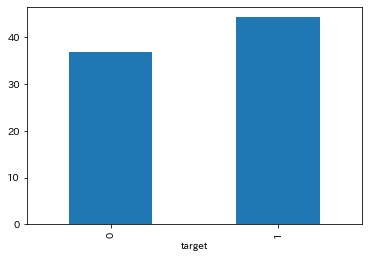

In [51]:
df_train.groupby("target").mean()["age"].plot.bar()

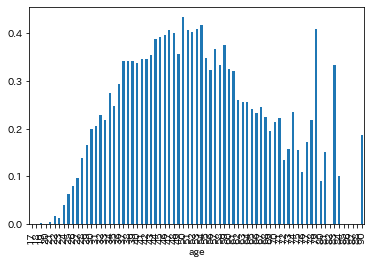

In [52]:
df_train.groupby("age").mean()["target"].plot.bar()

## capital gain(資産利得)との関係

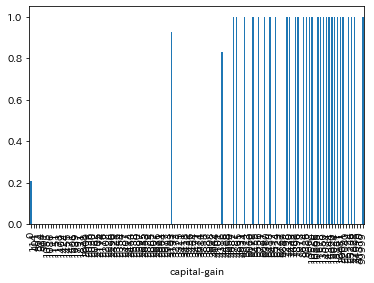

In [53]:
df_train.groupby("capital-gain").mean()["target"].plot.bar()

### binningを実施する

In [54]:
df_train["capital-gain_bin30"] = pd.cut(df_train["capital-gain"], 30)

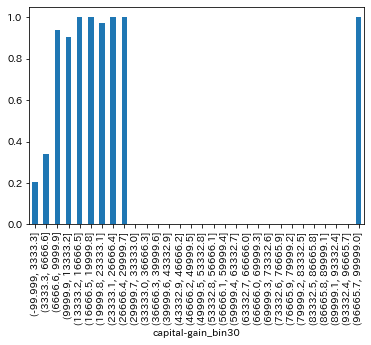

In [55]:
df_train.groupby("capital-gain_bin30").mean()["target"].plot.bar()

## 労働時間との比較

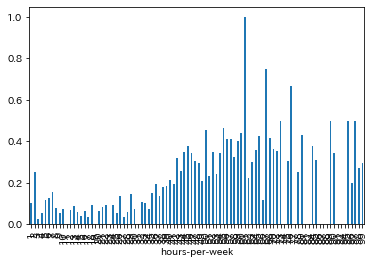

In [56]:
df_train.groupby("hours-per-week").mean()["target"].plot.bar()

## カテゴリカル変数の可視化

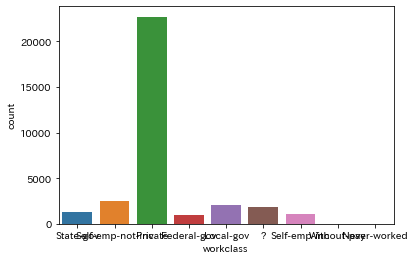

In [57]:
g = sns.countplot(x="workclass", data=df_train)

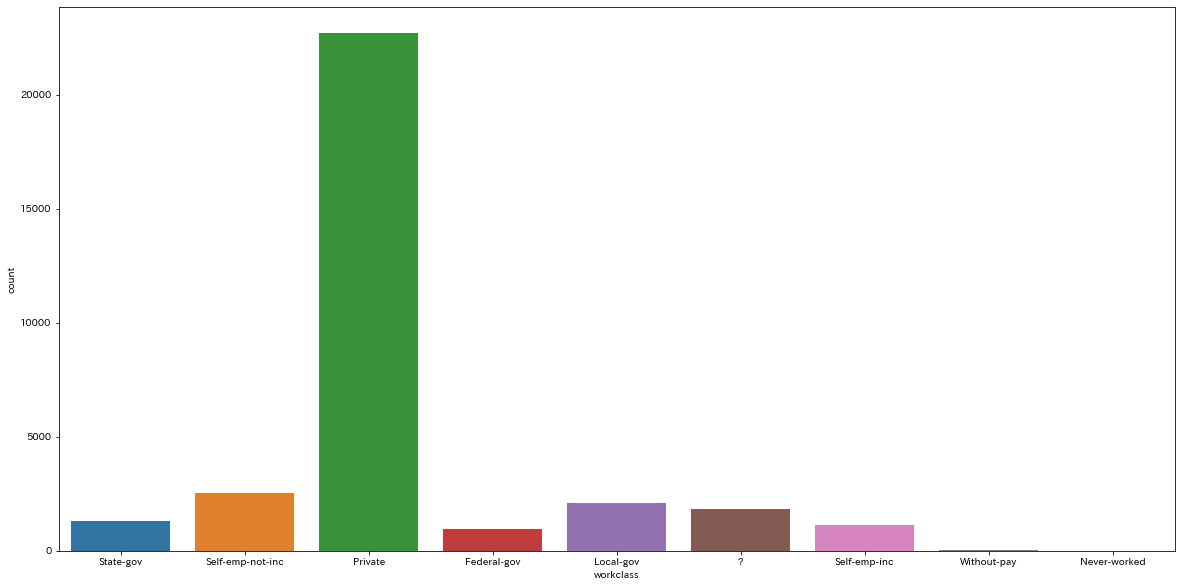

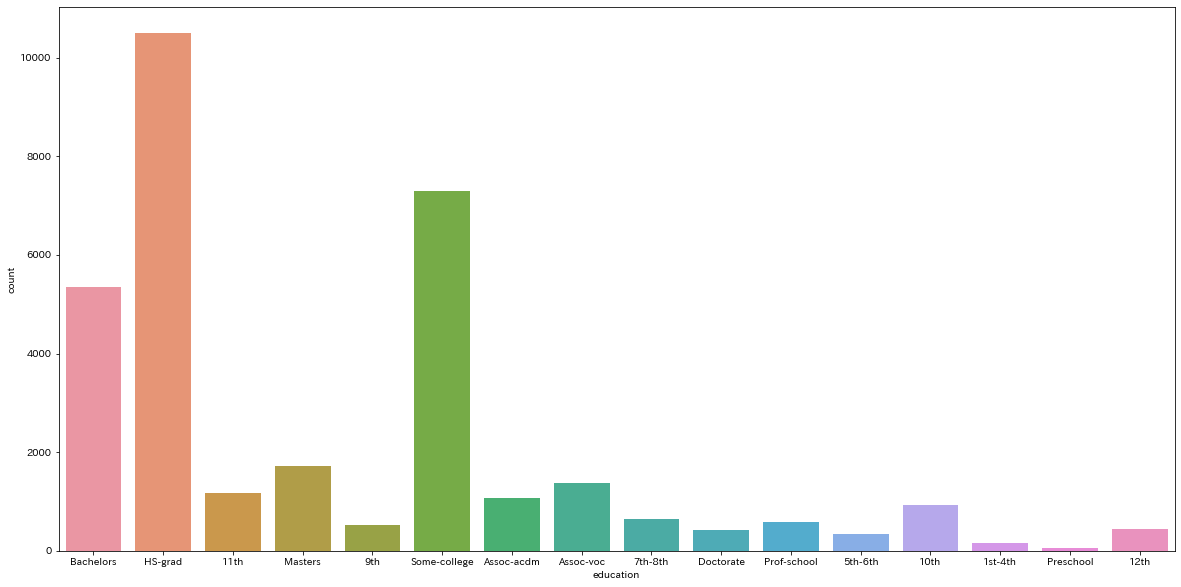

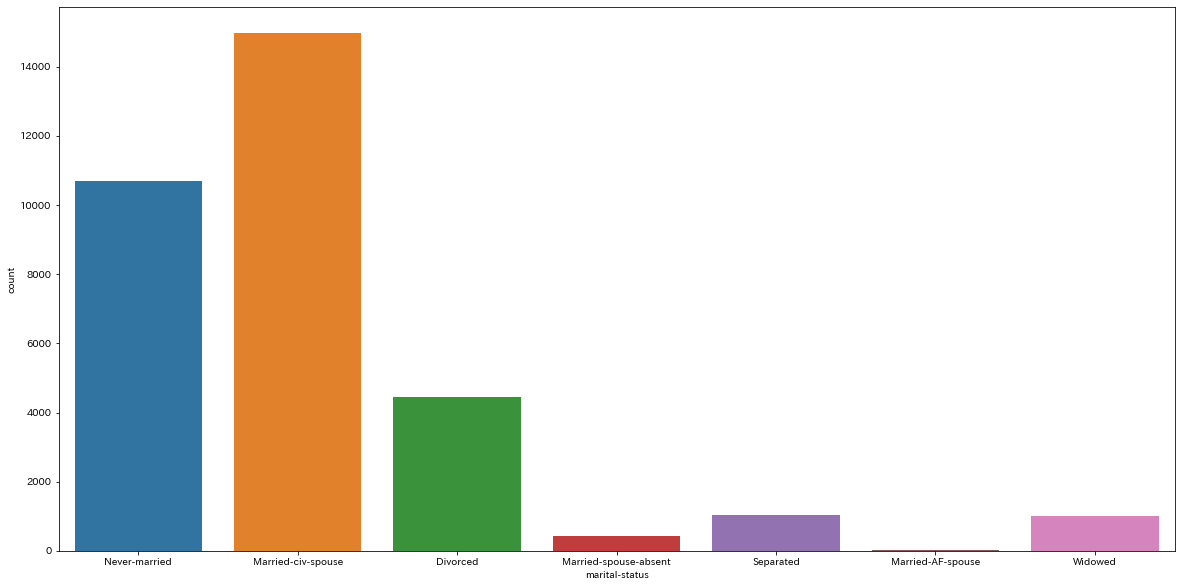

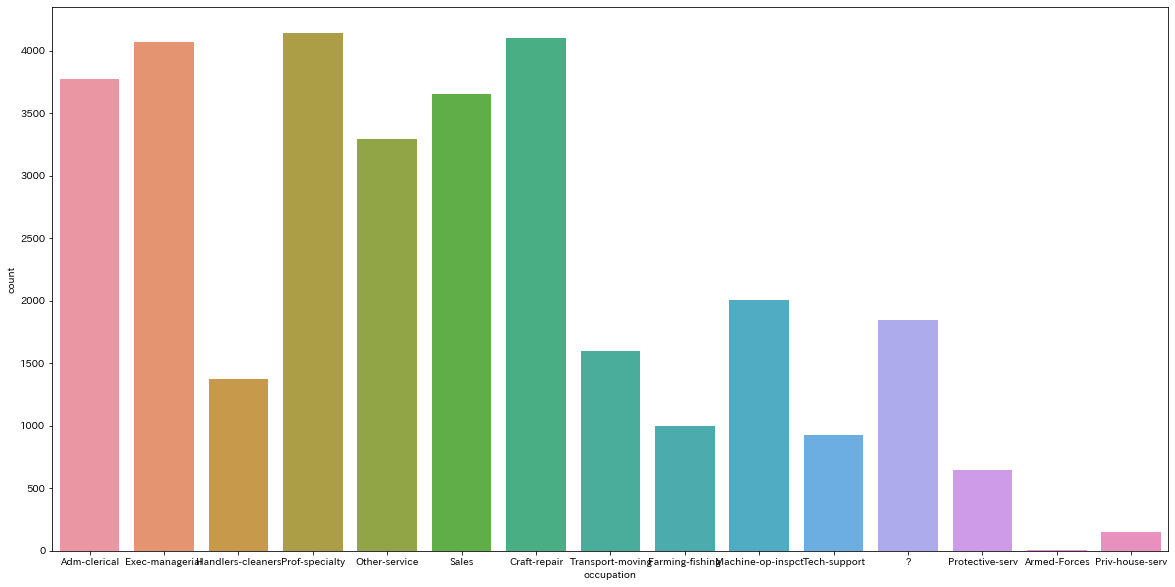

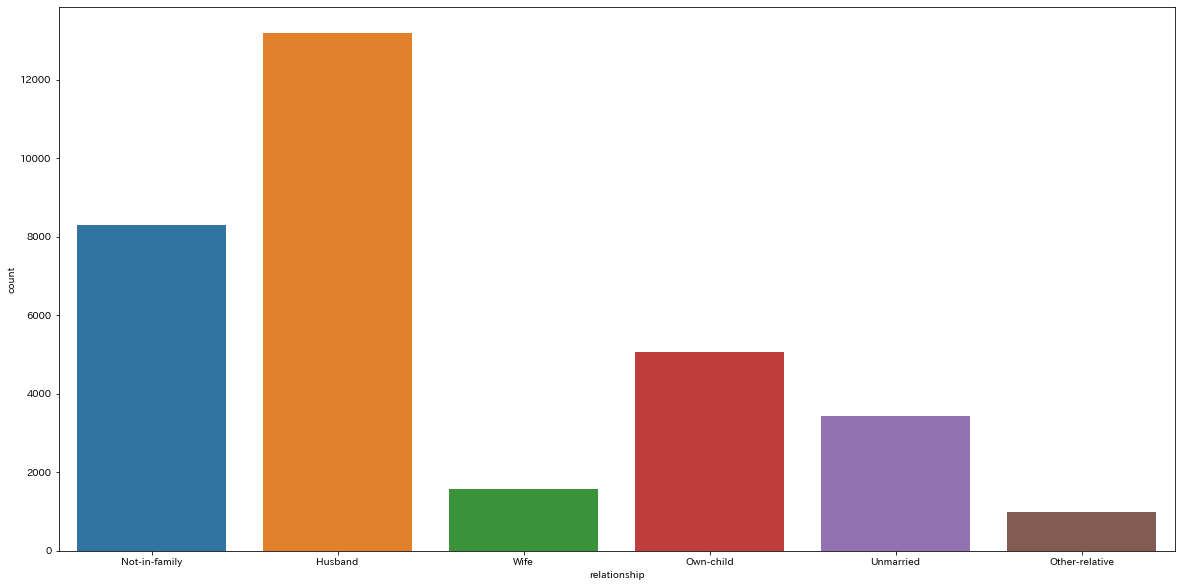

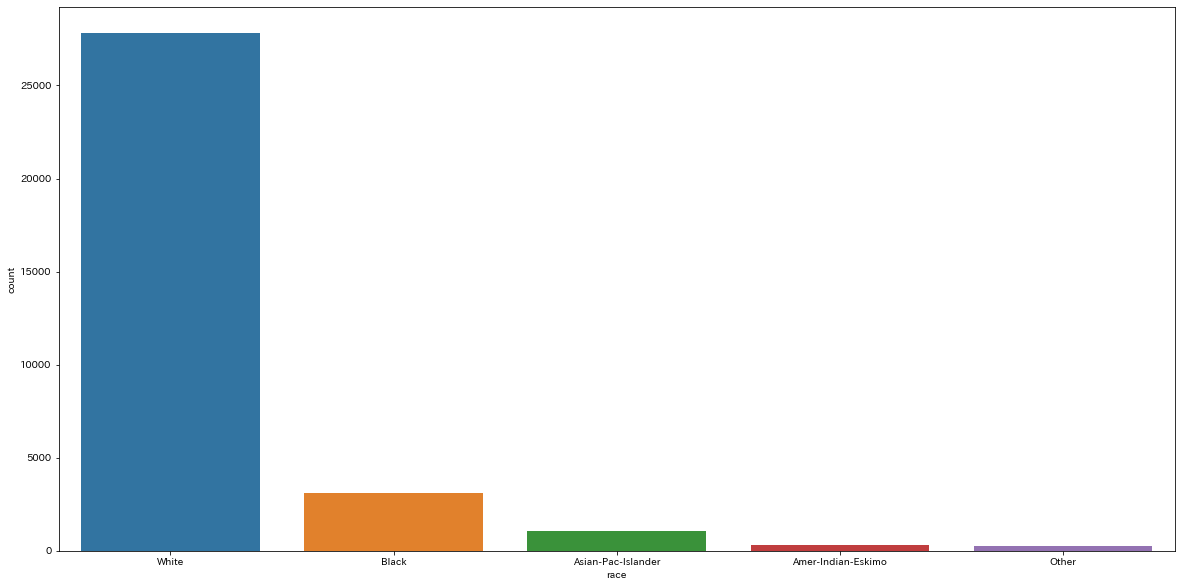

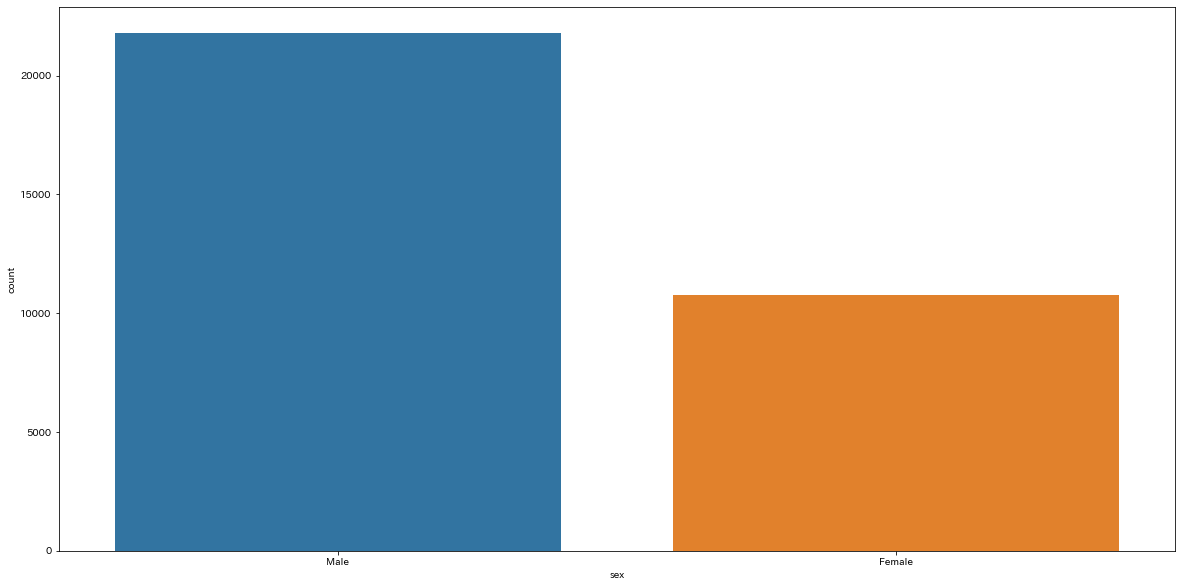

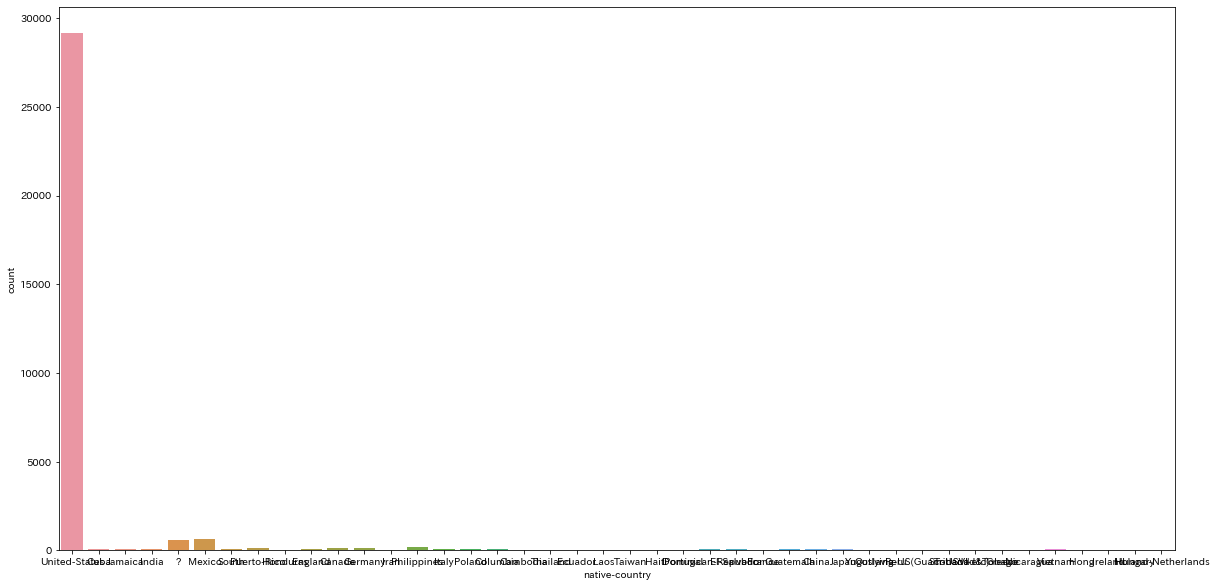

In [58]:
for col in categorical_values.keys():
    plt.figure(figsize=(20, 10))
    g = sns.countplot(x=col, data=df_train)
    plt.show()

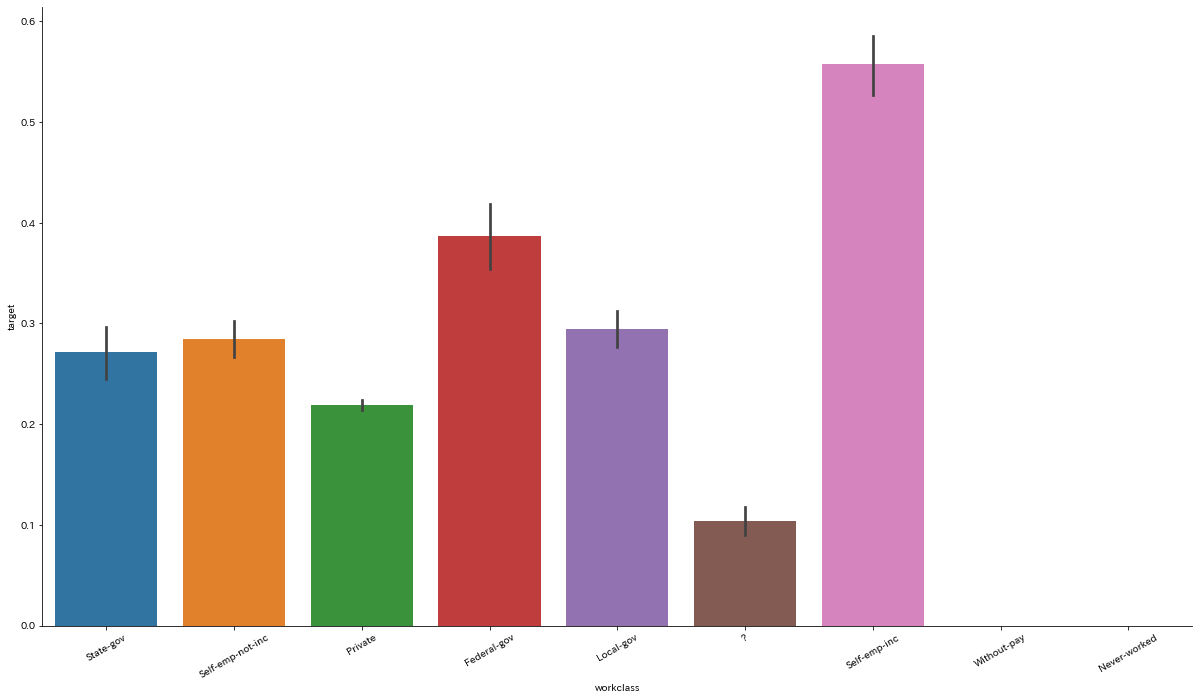

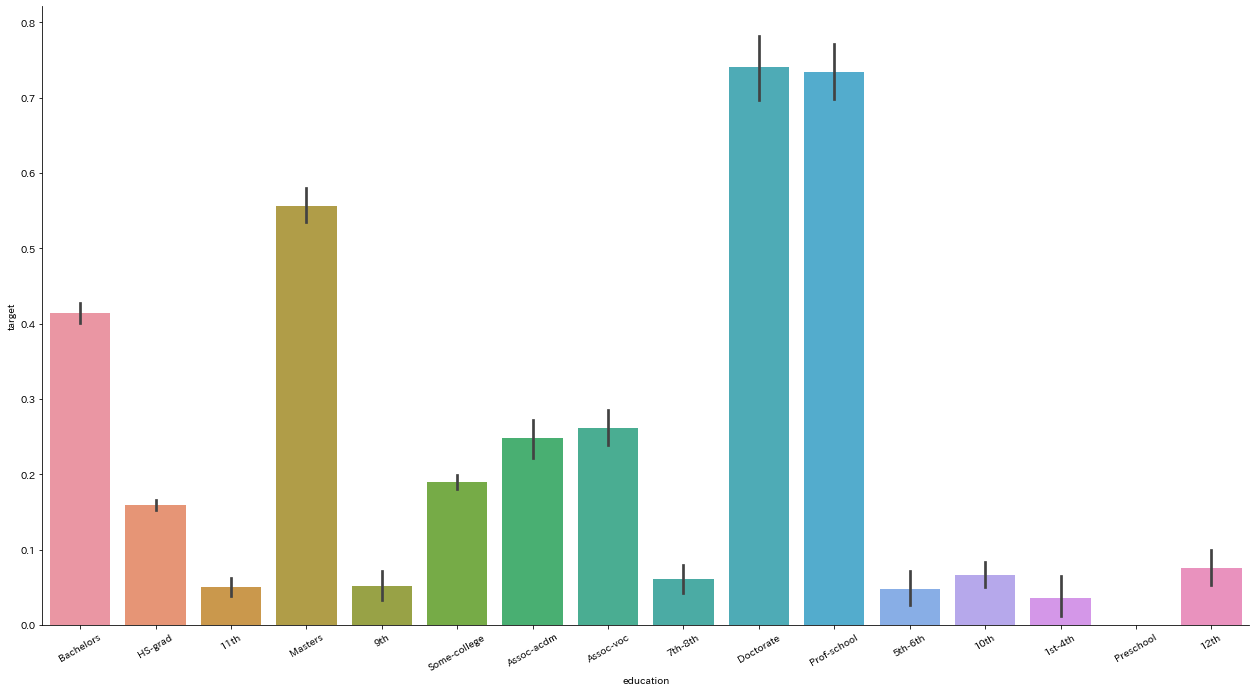

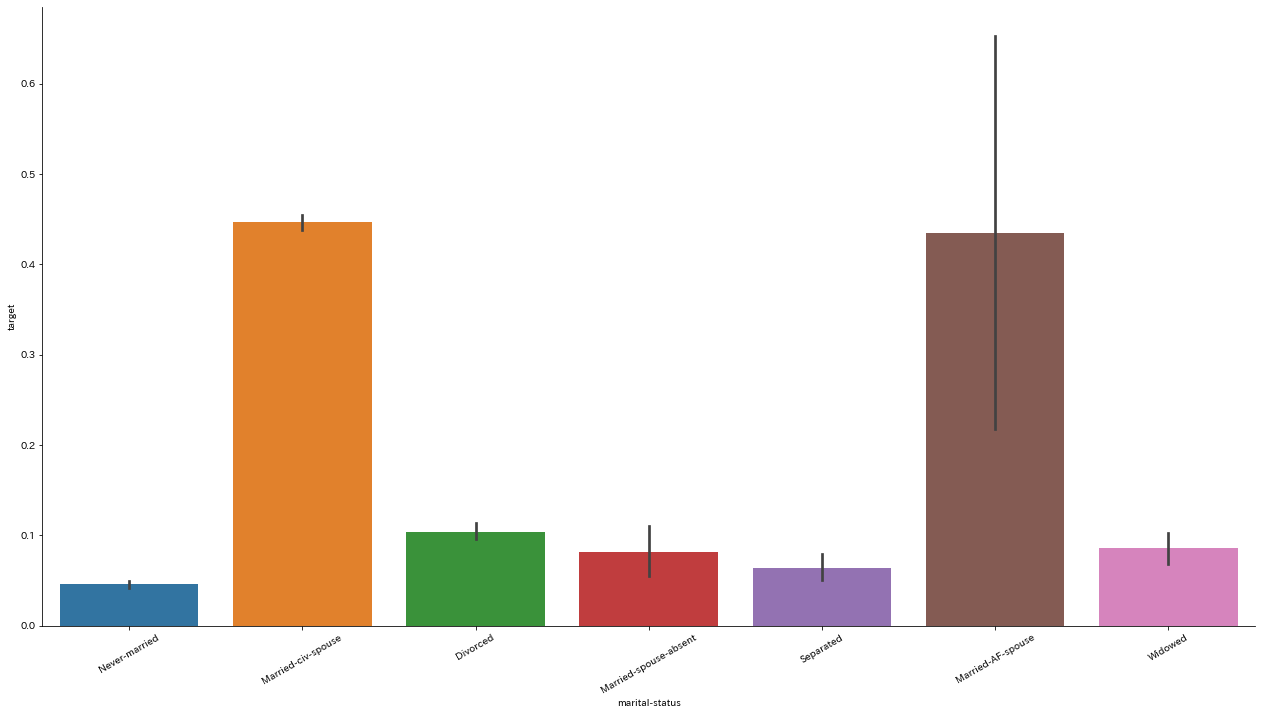

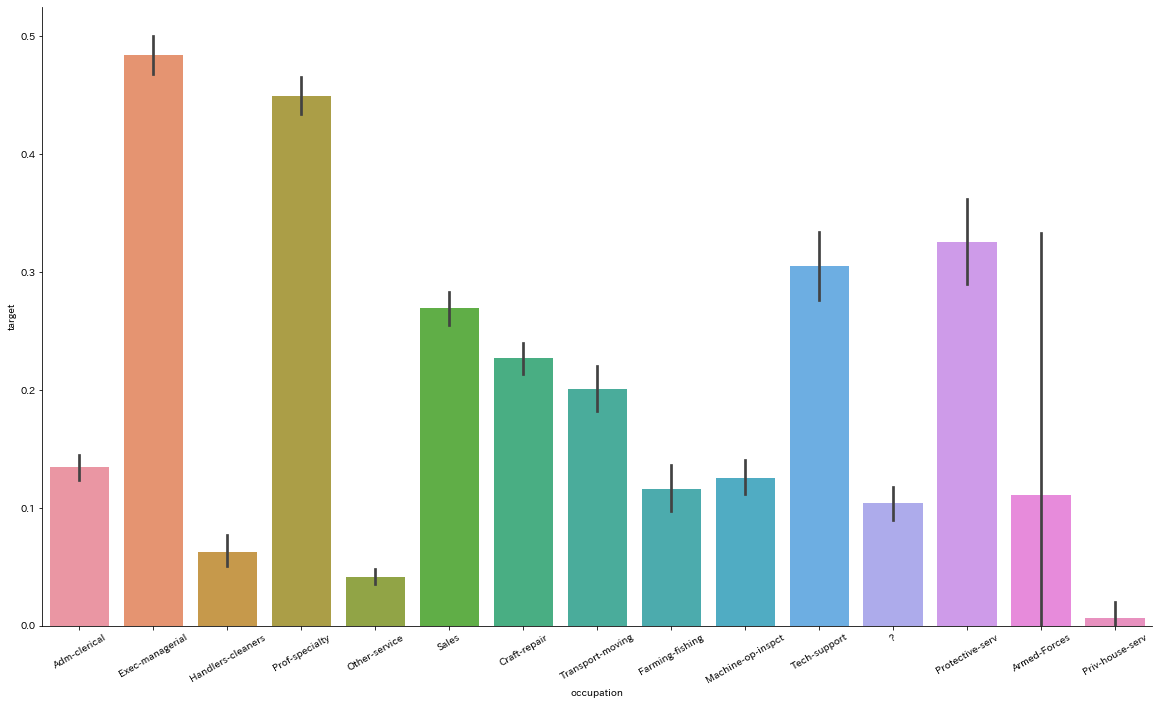

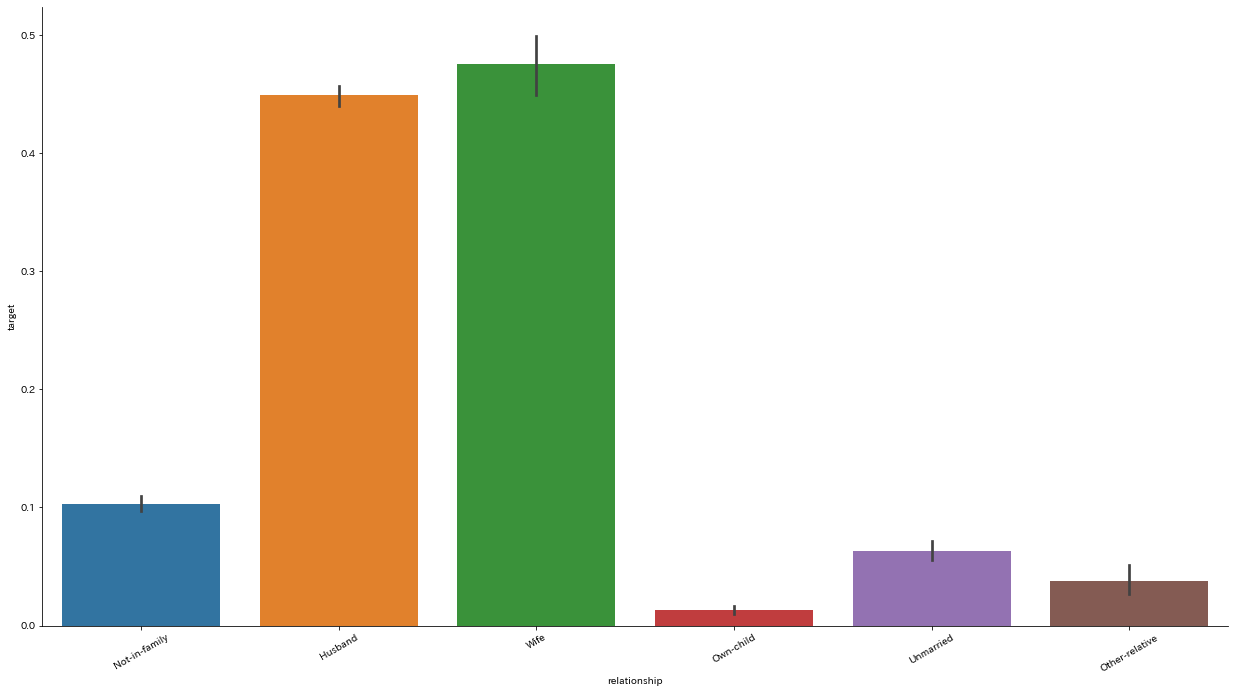

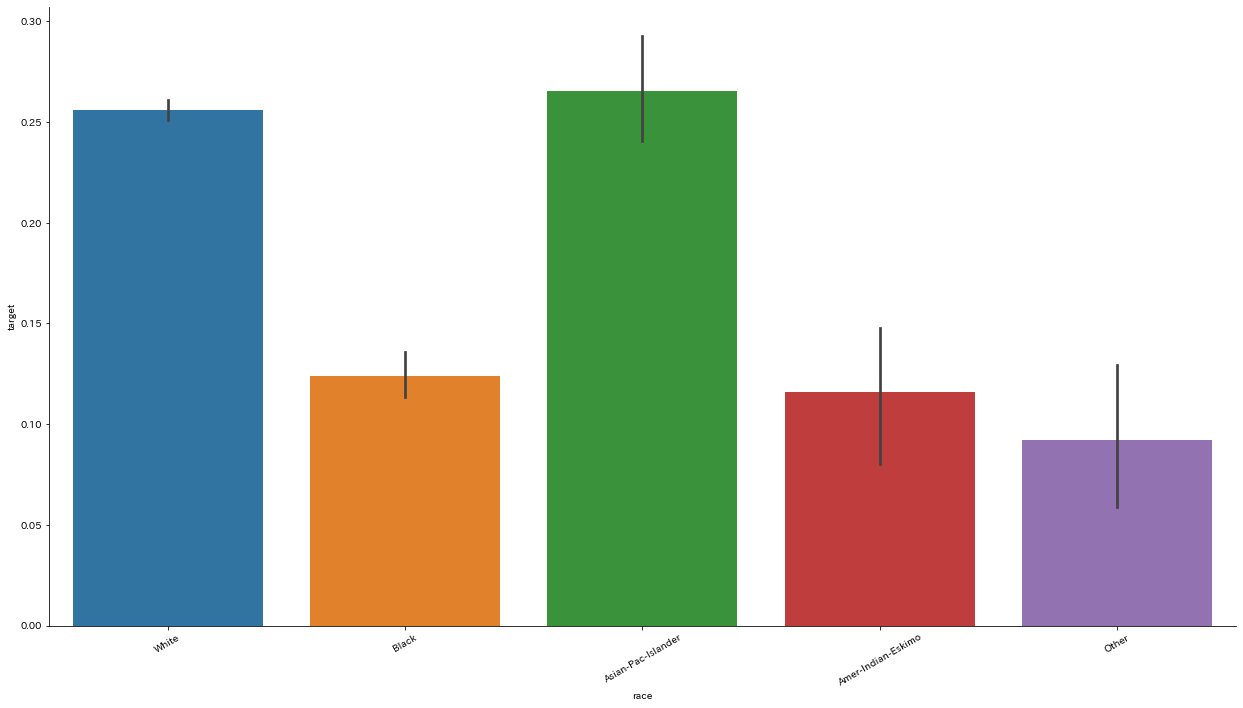

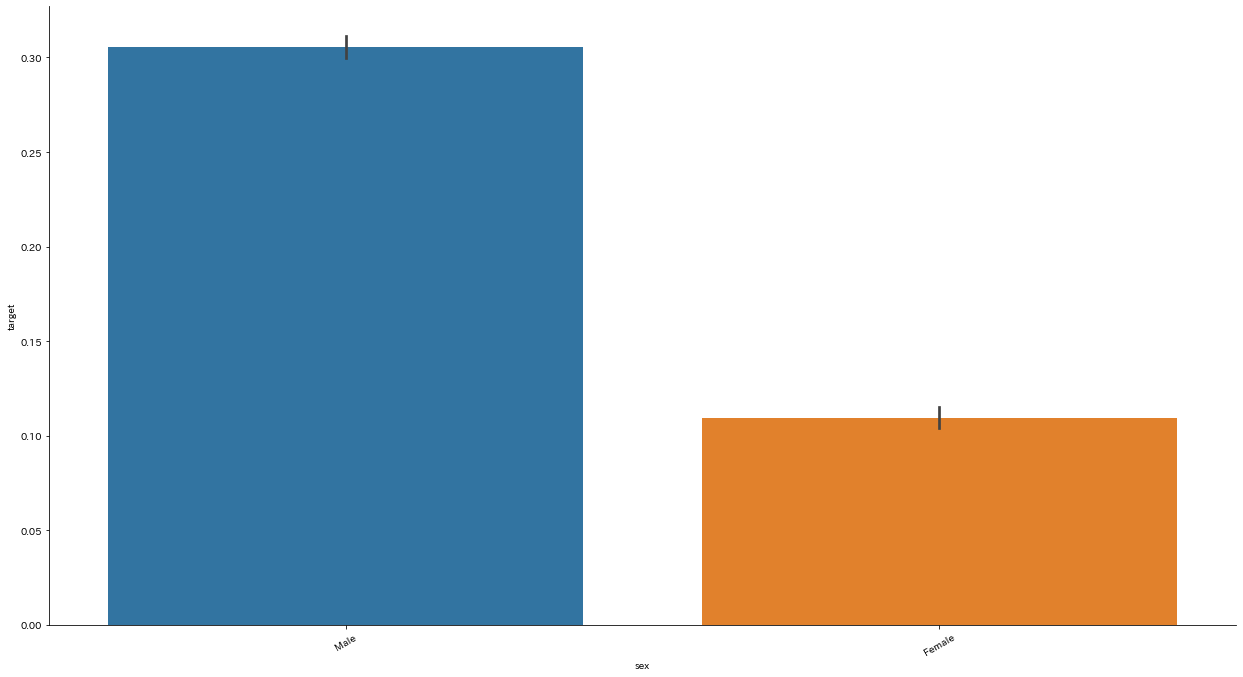

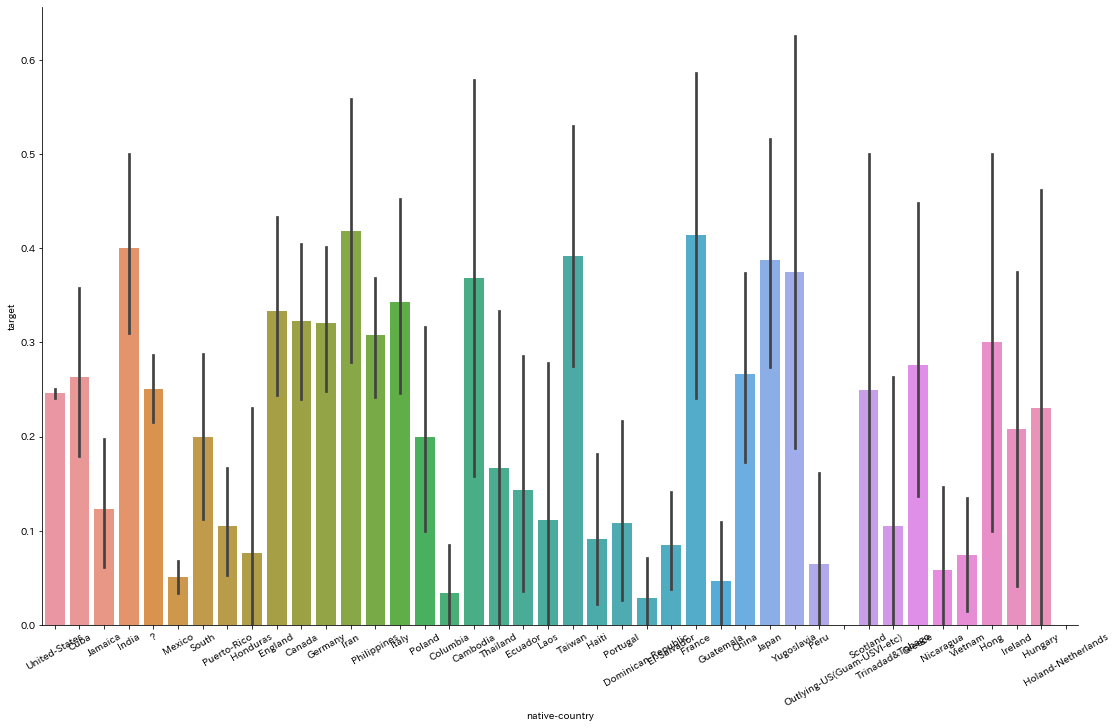

In [59]:
for col in categorical_values.keys():
    g = sns.catplot(x=col, y="target", kind="bar", data=df_train)
    g.fig.set_size_inches(20,10)
    g.set_xticklabels(rotation=30)
    plt.show()

# 予測分析

## カテゴリカル変数の利用 ~ label encoding ~

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [61]:
df_train["native-country"]

0        United-States
1        United-States
2        United-States
3        United-States
4                 Cuba
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native-country, Length: 32561, dtype: object

In [62]:
le_map = {}
for col in categorical_values.keys():
    le.fit(pd.concat([df_train, df_test])[col])
    df_train[col] = le.transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    le_map[col] = le

In [63]:
df_train["native-country"]

0        39
1        39
2        39
3        39
4         5
         ..
32556    39
32557    39
32558    39
32559    39
32560    39
Name: native-country, Length: 32561, dtype: int64

In [64]:
le_map["native-country"].classes_

array(['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
       'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'], dtype=object)

## 検証設計

validation: trainの20%

holdout(test): testデータ

In [65]:
from sklearn import model_selection

In [66]:
X_train, y_train = df_train.drop(columns="target"), df_train["target"]
X_test, y_test = df_test.drop(columns="target"), df_test["target"]

In [67]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2)

## LightGBMによる予測

In [68]:
import lightgbm as lgb

In [69]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'capital-gain_bin30'],
      dtype='object')

In [70]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,capital-gain_bin30
26365,47,4,34248,8,11,2,12,0,4,1,0,0,40,39,"(-99.999, 3333.3]"
32445,61,4,190682,11,9,6,3,1,2,0,0,1669,50,39,"(-99.999, 3333.3]"
30539,45,4,172274,10,16,0,10,4,2,0,0,3004,35,39,"(-99.999, 3333.3]"
8458,39,4,297449,9,13,2,10,0,4,1,0,0,40,39,"(-99.999, 3333.3]"
12108,34,4,294064,12,14,2,4,0,4,1,0,0,50,10,"(-99.999, 3333.3]"


In [71]:
feature_name = [e for e in X_train.columns.tolist() if e != "capital-gain_bin30"]
feature_name

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [72]:
#light gbm のデータセットの作成
lgb_train = lgb.Dataset(X_train[feature_name], y_train)
lgb_val    = lgb.Dataset(X_val[feature_name], y_val)
lgb_test  = lgb.Dataset(X_test[feature_name], y_test)

In [73]:
X_train.shape

(26048, 15)

In [74]:
y_train.shape

(26048,)

In [75]:
assert X_train.shape[0] == y_train.shape[0]
assert X_val.shape[0] == y_val.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [113]:
lgbm_params = {
    'objective': 'binary',
    'metric': 'auc',
    'num_iterations': 10000,
    "learning_rate": 0.01,
    'verbose':50
}

model = lgb.train(lgbm_params, lgb_train, valid_sets=[lgb_train, lgb_val], early_stopping_rounds=100, verbose_eval=50)

Training until validation scores don't improve for 100 rounds
[50]	training's auc: 0.908446	valid_1's auc: 0.908326
[100]	training's auc: 0.915498	valid_1's auc: 0.914455
[150]	training's auc: 0.919774	valid_1's auc: 0.918151
[200]	training's auc: 0.922561	valid_1's auc: 0.92055
[250]	training's auc: 0.925516	valid_1's auc: 0.92293
[300]	training's auc: 0.927926	valid_1's auc: 0.92457
[350]	training's auc: 0.930665	valid_1's auc: 0.926755
[400]	training's auc: 0.932822	valid_1's auc: 0.928166
[450]	training's auc: 0.934599	valid_1's auc: 0.929093
[500]	training's auc: 0.936138	valid_1's auc: 0.929829
[550]	training's auc: 0.93744	valid_1's auc: 0.930556
[600]	training's auc: 0.93868	valid_1's auc: 0.931011
[650]	training's auc: 0.939907	valid_1's auc: 0.931297
[700]	training's auc: 0.941138	valid_1's auc: 0.931495
[750]	training's auc: 0.942228	valid_1's auc: 0.931685
[800]	training's auc: 0.943139	valid_1's auc: 0.93189
[850]	training's auc: 0.944011	valid_1's auc: 0.932052
[900]	trai

In [77]:
from sklearn.metrics import roc_auc_score

# 精度検証

## 正解率(accuracy)
閾値p（確率がp以上の時に1とする）を0.5として計算する

In [78]:
pred_test = model.predict(X_test[feature_name])

In [79]:
pred_test.shape

(16281,)

In [80]:
pred_test[:10]

array([3.87352542e-03, 2.95479333e-01, 2.80165047e-01, 9.97474194e-01,
       1.95749815e-04, 6.25484315e-03, 3.83833895e-03, 9.46066131e-01,
       3.57766562e-03, 5.12247747e-02])

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
threshold = 0.5
func = lambda x: 1 if x > threshold else 0
pred_label = list(map(func, pred_test))
accuracy_score(pred_label, y_test)

0.8731036177138997

# Precision & Recall & AUC
<img src="precision_recall.png">

## Precision

In [83]:
from sklearn.metrics import precision_score

In [84]:
precision_score

<function sklearn.metrics.classification.precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

In [85]:
threshold = 0.5
pred_label = list(map(lambda x: 1 if x > threshold else 0, pred_test))
print(sum(pred_label)/len(y_test))
precision_score(y_test, pred_label)

0.20060192862846263


0.7725045927740355

In [86]:
threshold = 0.9
pred_label = list(map(lambda x: 1 if x > threshold else 0, pred_test))
print(sum(pred_label)/len(y_test))
precision_score(y_test, pred_label)

0.06393956145199926


0.9923150816522575

## Recall

In [87]:
from sklearn.metrics import recall_score

In [88]:
recall_score

<function sklearn.metrics.classification.recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

In [89]:
threshold = 0.5
pred_label = list(map(lambda x: 1 if x > threshold else 0, pred_test))
print(sum(pred_label)/len(y_test))
recall_score(y_test, pred_label)

0.20060192862846263


0.65600624024961

In [90]:
threshold = 0.1
pred_label = list(map(lambda x: 1 if x > threshold else 0, pred_test))
print(sum(pred_label)/len(y_test))
recall_score(y_test, pred_label)

0.4553774338185615


0.9479979199167967

## 混合行列(confusion matrix)

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
threshold = 0.5
pred_label = list(map(lambda x: 1 if x > threshold else 0, pred_test))
confusion_matrix(pred_label, y_test)

array([[11692,  1323],
       [  743,  2523]])

## AUC(area under the curve)

### ダミーデータによる理解

In [93]:
from sklearn.metrics import roc_curve, auc

In [94]:
true_label = [0, 0, 1, 1, 1, 0, 0, 1, 1]

In [95]:
# 最高精度の予測
predicted_rank = [1, 2, 5, 6, 7, 3, 4, 8, 9]

In [96]:
df = pd.DataFrame([])
df["true_label"] = true_label
df["predicted_rank"] = predicted_rank 

In [97]:
df

,true_label,predicted_rank
0,0,1
1,0,2
2,1,5
3,1,6
4,1,7
5,0,3
6,0,4
7,1,8
8,1,9


In [98]:
df.sort_values(by="predicted_rank", ascending=False)

,true_label,predicted_rank
8,1,9
7,1,8
4,1,7
3,1,6
2,1,5
6,0,4
5,0,3
1,0,2
0,0,1


この時、rankで並び替えるとtrue labelが完全に分離できるため、二値分類では最高精度と言って良い

In [99]:
predicted_rank = [1, 2, 3, 5, 7, 4, 6, 8, 9]
df["predicted_rank"] = predicted_rank
df.sort_values(by="predicted_rank", ascending=False)

,true_label,predicted_rank
8,1,9
7,1,8
4,1,7
6,0,6
3,1,5
5,0,4
2,1,3
1,0,2
0,0,1


この場合、rank6が誤判定を起こしているため、精度は悪化していると考える

上記のような精度を定量的に評価したい場合どうすれば良いか？

In [100]:
fpr, tpr, thresholds = roc_curve(true_label, predicted_rank)

In [101]:
fpr

array([0.  , 0.  , 0.  , 0.25, 0.25, 0.5 , 0.5 , 1.  ])

In [102]:
tpr

array([0. , 0.2, 0.6, 0.6, 0.8, 0.8, 1. , 1. ])

In [103]:
thresholds

array([10,  9,  7,  6,  5,  4,  3,  1])

In [104]:
df.sort_values(by="predicted_rank", ascending=False)

,true_label,predicted_rank
8,1,9
7,1,8
4,1,7
6,0,6
3,1,5
5,0,4
2,1,3
1,0,2
0,0,1


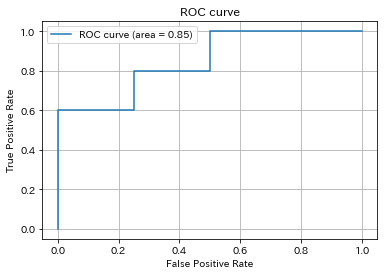

In [105]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc(fpr, tpr))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [106]:
# 完璧な予測
predicted_rank = [1, 2, 5, 6, 7, 3, 4, 8, 9]
df["predicted_rank"] = predicted_rank
df.sort_values(by="predicted_rank", ascending=False)

,true_label,predicted_rank
8,1,9
7,1,8
4,1,7
3,1,6
2,1,5
6,0,4
5,0,3
1,0,2
0,0,1


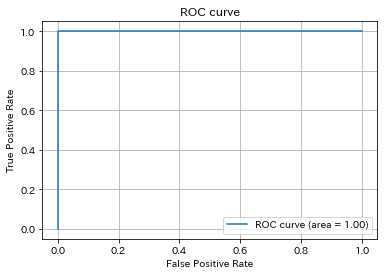

In [107]:
fpr, tpr, thresholds = roc_curve(true_label, predicted_rank)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc(fpr, tpr))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## AUC(今回のデータセットに適用する)

In [108]:
# FPR, TPR(, しきい値) を算出
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
fpr

array([0.        , 0.        , 0.        , ..., 0.99670285, 0.99686369,
       1.        ])

In [109]:
tpr

array([0.00000000e+00, 2.60010400e-04, 2.10088404e-01, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [110]:
thresholds

array([1.99967075e+00, 9.99670753e-01, 9.77754876e-01, ...,
       1.21505693e-04, 1.19831821e-04, 7.01062693e-06])

In [111]:
auc_score = auc(fpr, tpr)
auc_score

0.9263260896338548

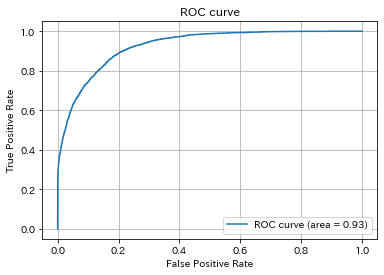

In [112]:
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc_score)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)